# Plotting History of Robot States

This script should extract the data history.p in the ./data folder

Data:
see below and IDM.py for what arrays are included

Jake Sganga
2/4/2016


In [91]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import mpld3
# mpld3.enable_notebook()

# from matplotlib import rc
# # rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# # rc('text', usetex=True)

sns.set_style("dark")
sns.set_context("talk")

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

blue, green, red, purple = sns.color_palette("deep")[:4]
color_list = [blue, green, red, purple]

## Ascension Data

Auto generated when we call the get_position function, which returns the asynchronous data dict

See idm.GetHistoryArray() to verify the naming convention is valid

In [92]:
with open( "../robot_model/data/history.p", "rb" ) as input_file:
            history = pickle.load(input_file)
history.shape

(1584, 17)

In [93]:
time, x_sensed, x_raw, x_desired, q, q_desired, J, W, amps, forces, forces_raw, R, tension, angles_sensed, angles_model, scalar_sensed, dx_predicted = history.T
# For some reason this gives you 1D arrays of arrays that won't let you index through them. Below allows that.
time = np.asarray(list(time))
x_sensed = np.asarray(list(x_sensed))
x_raw = np.asarray(list(x_raw))
x_desired = np.asarray(list(x_desired))
q = np.asarray(list(q))
q_desired = np.asarray(list(q_desired))
J = np.asarray(list(J))
W = np.asarray(list(W))
amps = np.asarray(list(amps))
forces = np.asarray(list(forces))
forces_raw = np.asarray(list(forces_raw))
R = np.asarray(list(R))
tension = np.asarray(list(tension))
angles_sensed = np.asarray(list(angles_sensed))
angles_model = np.asarray(list(angles_model))
# print(x_sensed.shape,x_full.shape, x_raw.shape, x_true.shape)
x, y, z, a, e = x_sensed[:,0],x_sensed[:,1], x_sensed[:,2],x_sensed[:,3],x_sensed[:,4]

forces.shape

(1584, 6)

(-20, 20, -20, 20)

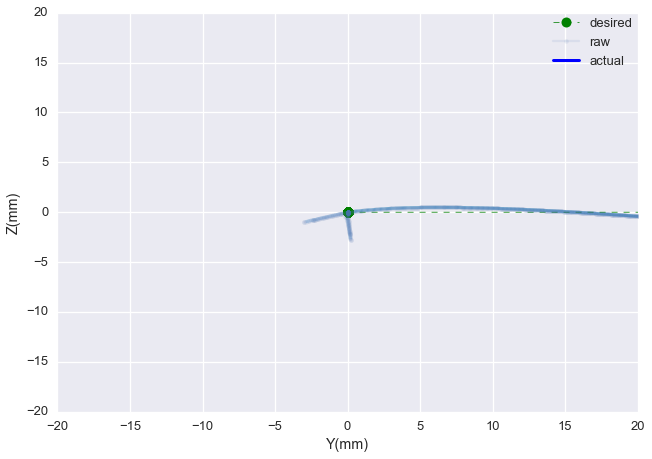

In [94]:


t = np.linspace(2, 10, len(y))

points = np.array([y,z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[1:,1], x_desired[1:,2], 'g--.',lw = 0.75, ms = 20, label = 'desired')
plt.plot(x_raw[:,1], x_raw[:,2], '.-', alpha = 0.1, label = 'raw')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
plt.axis((-side,side,-side,side))

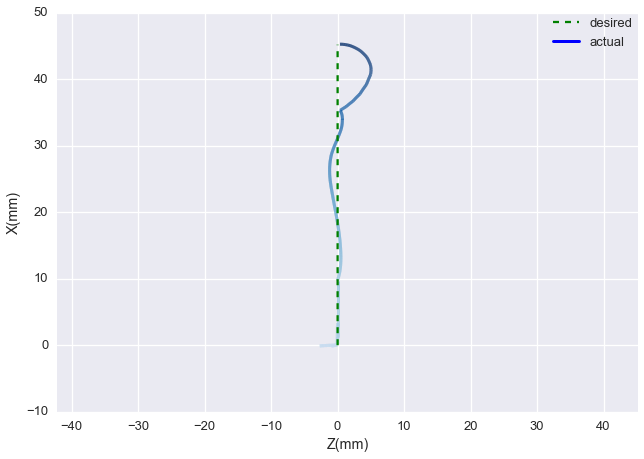

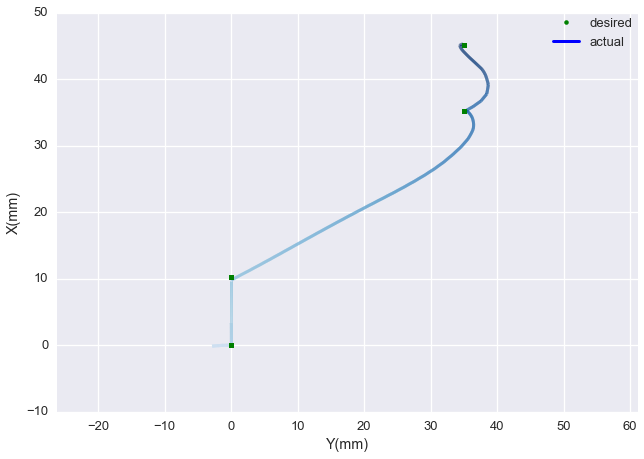

In [95]:
points = np.array([z, x]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[:,2],x_desired[:,0], 'g--', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.ylabel('X(mm)')
plt.xlabel('Z(mm)')
plt.axis('equal')
side = 20

plt.figure()
points = np.array([y, x]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[:,1], x_desired[:,0], 'g.', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('X(mm)')
plt.axis('equal')
side = 20

# plt.axis((-side,side,-side,side))

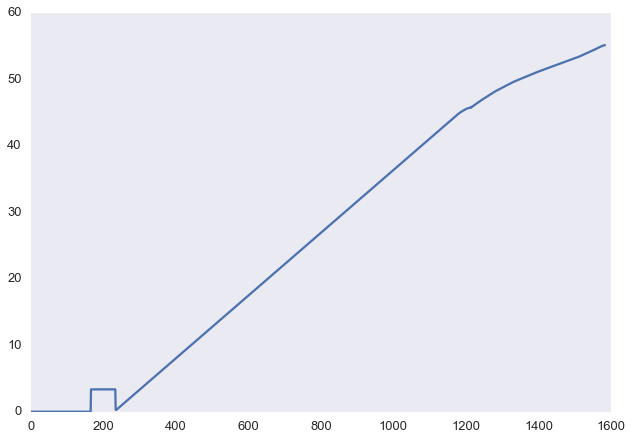

In [121]:
plt.plot(q[:,8])

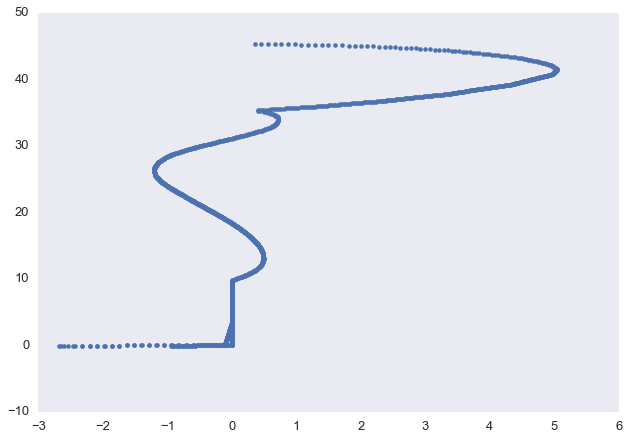

In [97]:
plt.plot(x_sensed[:,2],x_sensed[:,0], '.')

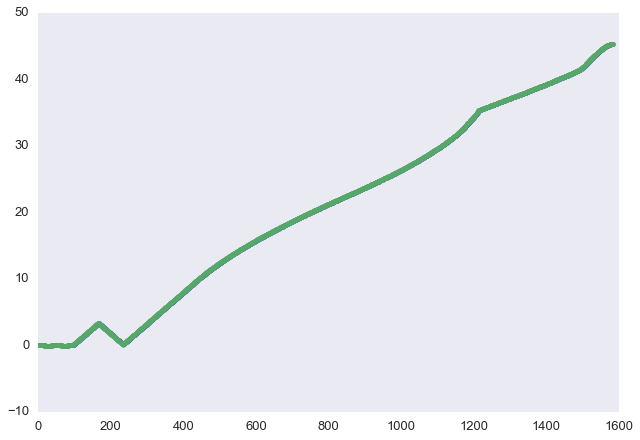

In [98]:
plt.plot(x_sensed[:,0],'.')
plt.plot(x_raw[:,0],'.')

5
[  10  184  359  534  709  883 1058 1233 1408 1583]


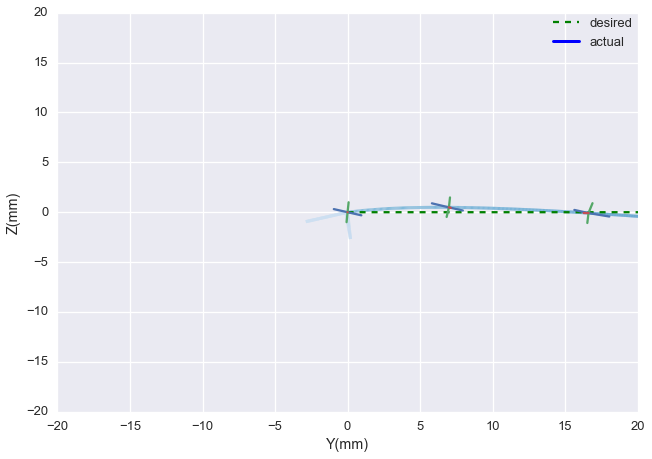

In [99]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

t = np.linspace(2, 10, len(y))

points = np.array([y,z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('Blues'),
                    norm=plt.Normalize(0, 10))
lc.set_array(t)
lc.set_linewidth(3)
lc.set_label('actual')
plt.gca().add_collection(lc)
plt.plot(x_desired[1:,1], x_desired[1:,2], 'g--', label = 'desired')
plt.legend(loc=0, borderaxespad=0)
plt.grid(True)
plt.xlabel('Y(mm)')
plt.ylabel('Z(mm)')
side = 20
plt.axis((-side,side,-side,side))


color_index = [0, 1, 0, 1, 2, 3, 2, 3, 4,4,4,4] # matching the colors for antagonistic cables
x_num, q_num = J[0,:].shape
print(q_num)
y_scale = 1
z_scale = -1
ind_location = 100
ind_list = np.linspace(10, len(time) - 1, 10).astype(int)
print(ind_list)
for ind_location in ind_list:
    for i in range(q_num):
        if i == q_num - 1:
            y_scale = -y_scale
            z_scale = -z_scale
        y_loc = y[ind_location]
        z_loc = z[ind_location]
        plt.plot([y_loc, y_loc + y_scale * J[ind_location, 1, i]], [z_loc, z_loc + z_scale * J[ind_location, 2, i]], 
                 color = sns.color_palette()[color_index[i]])

note on this plot: the jagged 90 deg moves for x_desired is likely stemming from the button 'A' - homing command, which leaves the normal loop and, therefore, does not update the x_desired.

skeptical about this plot becuase it calculates x_desired as x_current + dx_desired (which is quite small)

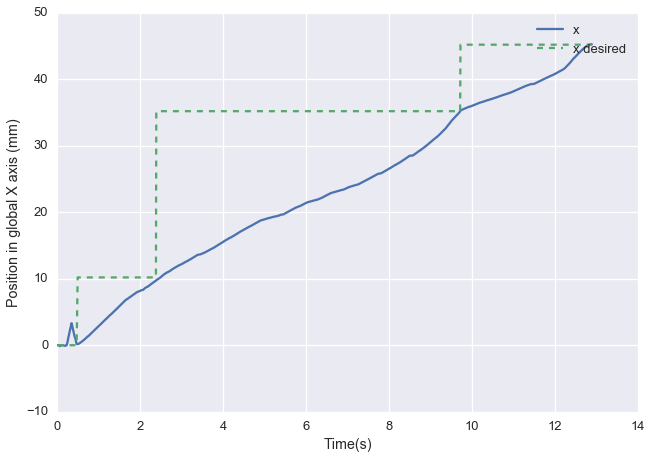

In [100]:
plt.plot(time, x, '-')
plt.plot(time, x_desired[:,0], '--')
plt.legend(['x', 'x desired'])
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Position in global X axis (mm)')

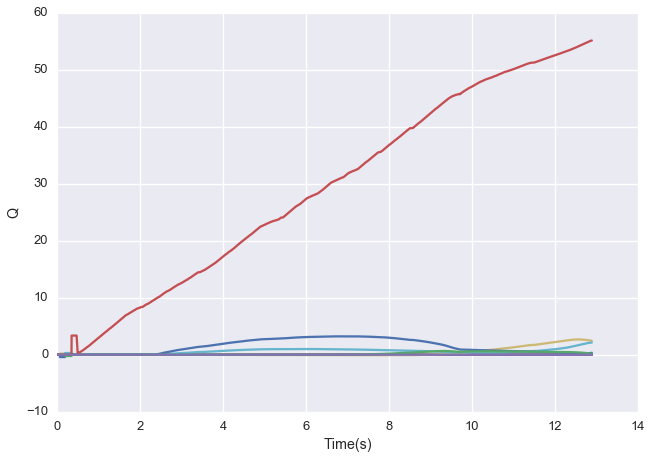

In [101]:
plt.plot(time, q[:,:],'-')
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Q')

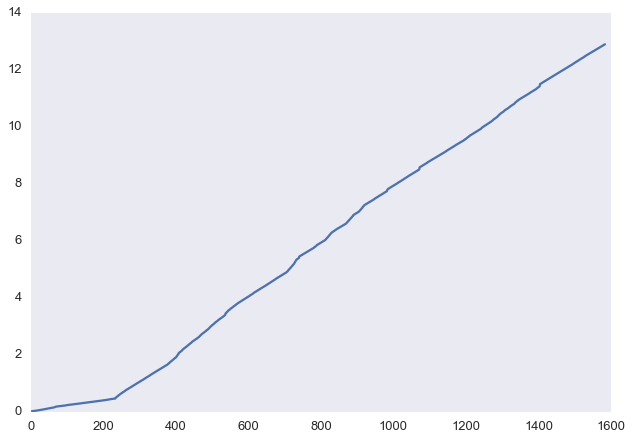

In [102]:
plt.plot(time)

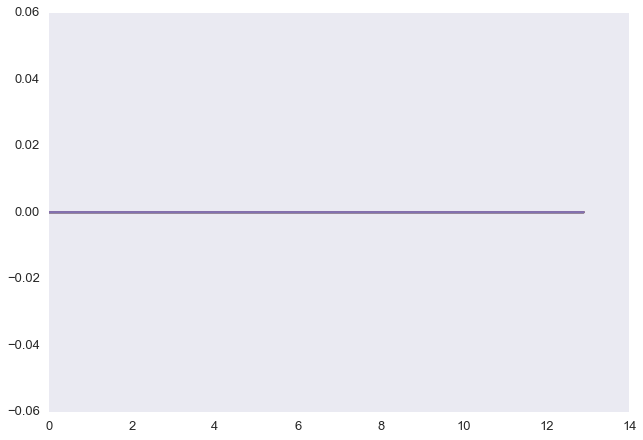

In [103]:
plt.plot(time, q[:,:4],'-')


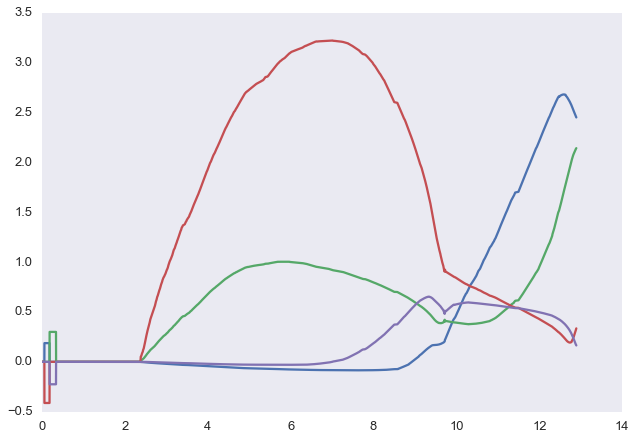

In [104]:
plt.plot(time, q[:,4:8],'-')


In [105]:
J.shape

(1584, 3, 5)

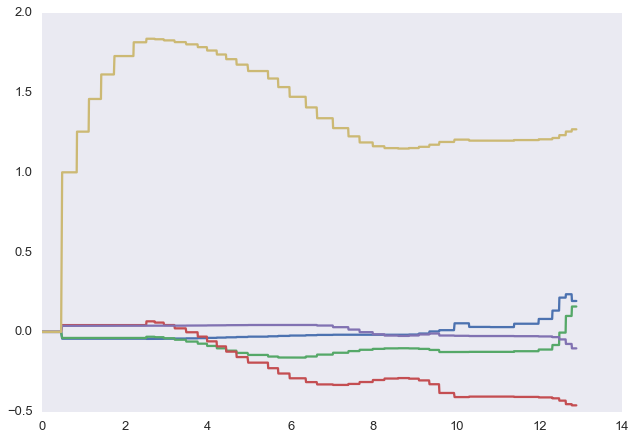

In [106]:
plt.plot(time,J[:,0,:])

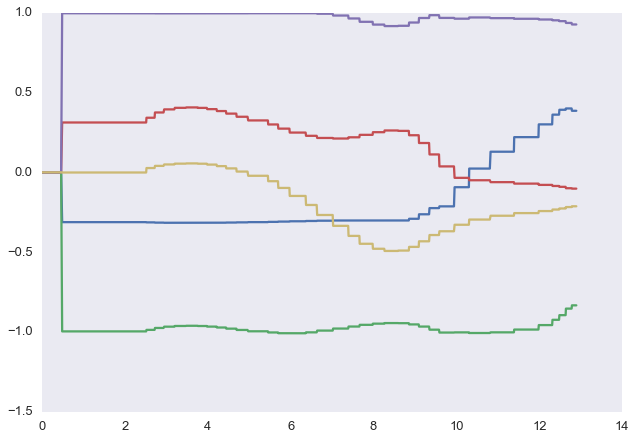

In [107]:
plt.plot(time,J[:,2,:])

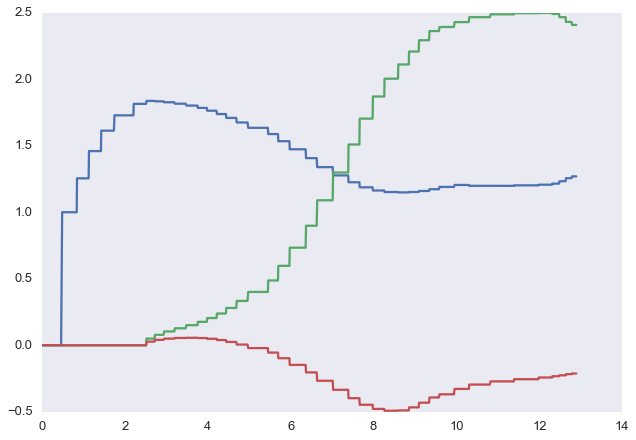

In [108]:
plt.plot(time, J[:,:,-1])

(1584, 3, 3)


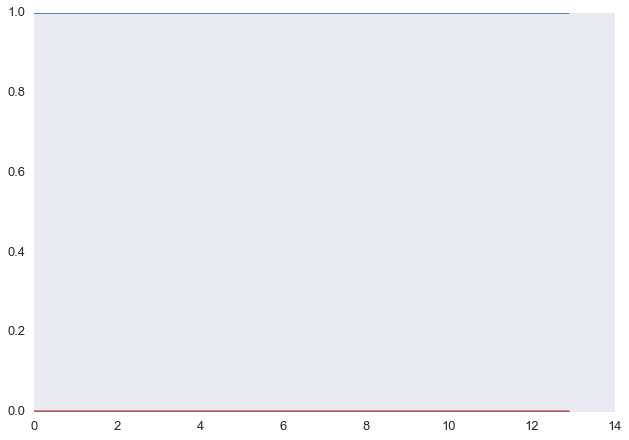

In [109]:
print(R.shape)
plt.plot(time, R[:,0,:])

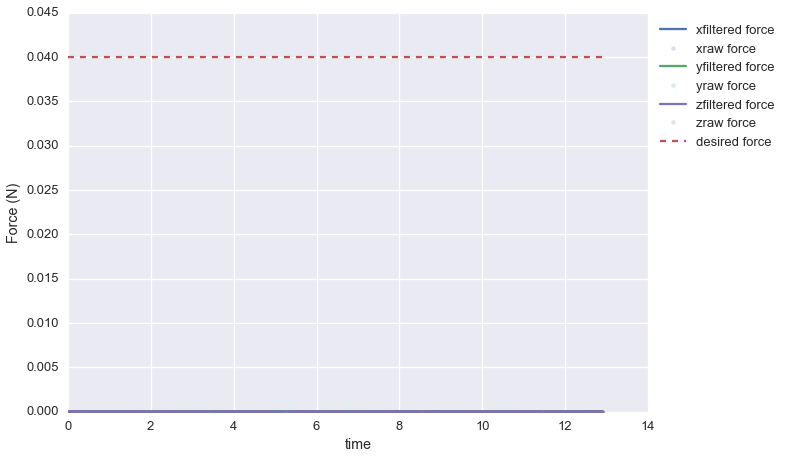

In [110]:
# plt.plot(time, forces_raw[:,:3],'.', alpha = 0.2, label = 'raw')
# plt.plot(time, forces[:,2], label = 'sensed z force')
# plt.plot(time, -forces[:,1], label = 'sensed y force')
d = ['x', 'y', 'z']
c = [blue, green, purple]
for i,xyz in enumerate(d):
    plt.plot(time, forces[:,i], color = c[i], label = xyz + 'filtered force')
    plt.plot(time, forces_raw[:,i], '.', color = c[i], alpha = 0.2,  label = xyz + 'raw force')
    
plt.plot(time, 0*time + 0.04, '--',color = red,  label = 'desired force')
# plt.plot(forces)
plt.xlabel('time')
plt.ylabel('Force (N)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])
plt.grid(True)

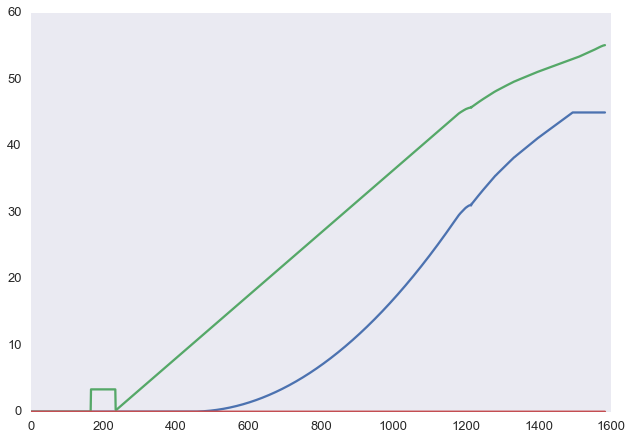

In [111]:
plt.plot(angles_model[:,0] * 180 / np.pi)
plt.plot(q[:,8])
plt.plot(q[:,9])

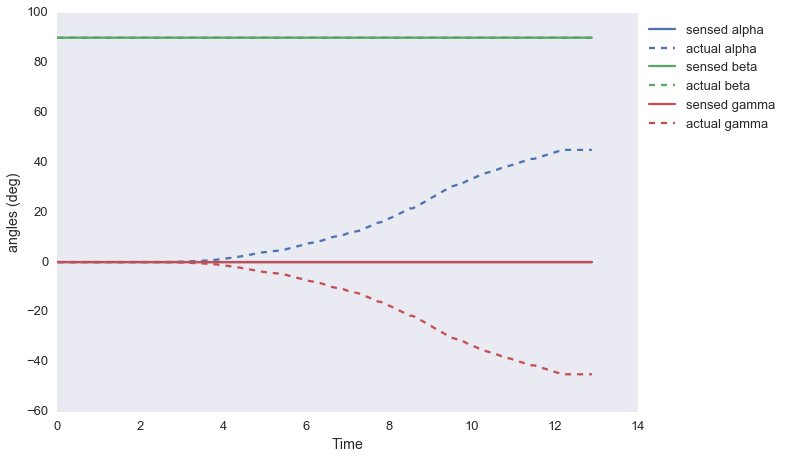

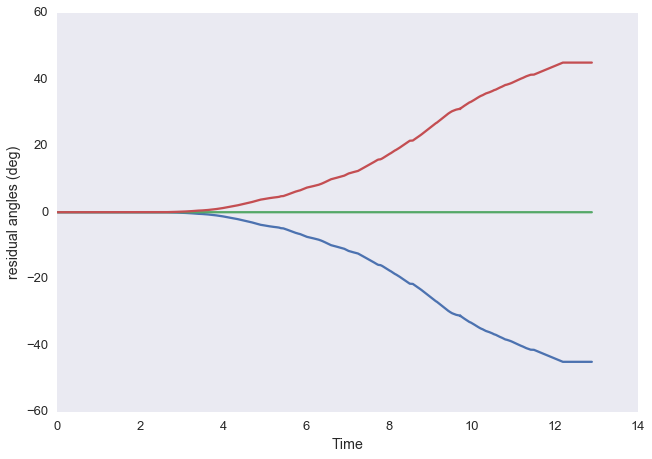

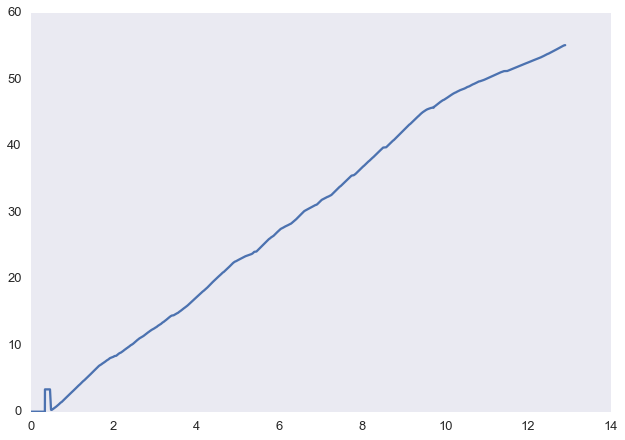

In [112]:

angle_names = ['alpha', 'beta', 'gamma']
for i in range(3):
    plt.plot(time, angles_sensed[:,i] * 180/np.pi, color = color_list[i], label = r'sensed '+angle_names[i])
    plt.plot(time, angles_model[:,i] * 180/np.pi, '--', label = 'actual ' +angle_names[i])
plt.xlabel('Time')
plt.ylabel('angles (deg)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])

plt.figure()
plt.plot(time, (angles_sensed - angles_model)* 180/np.pi)
plt.xlabel('Time')
plt.ylabel('residual angles (deg)')

plt.figure()
plt.plot(time, q[:,8])

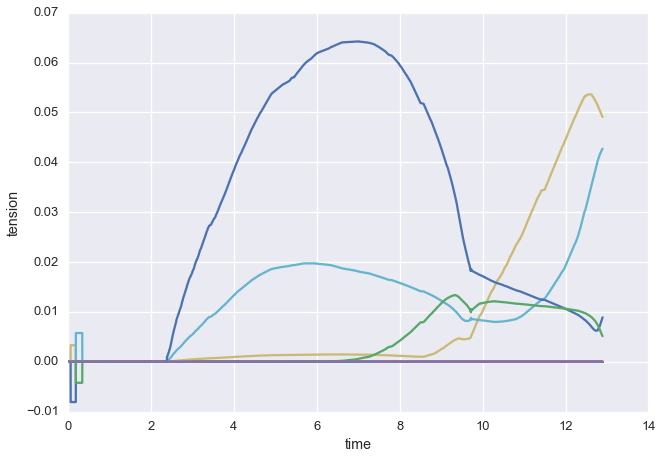

In [113]:
plt.plot(time, tension[:,:])
plt.xlabel('time')
plt.ylabel('tension')
plt.grid(True)

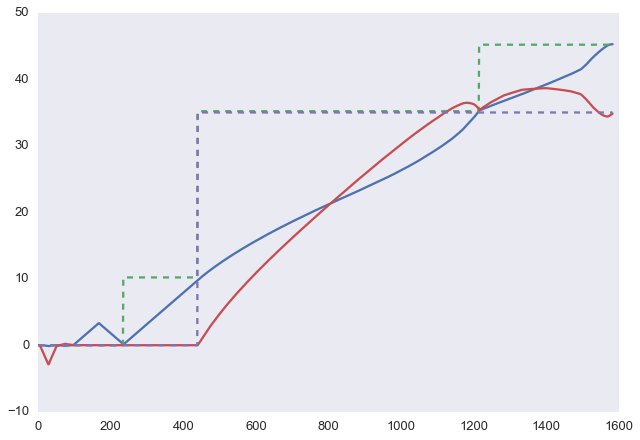

In [114]:
plt.plot(x)
plt.plot(x_desired[:,0], '--')
plt.plot(y)
plt.plot(x_desired[:,1], '--')

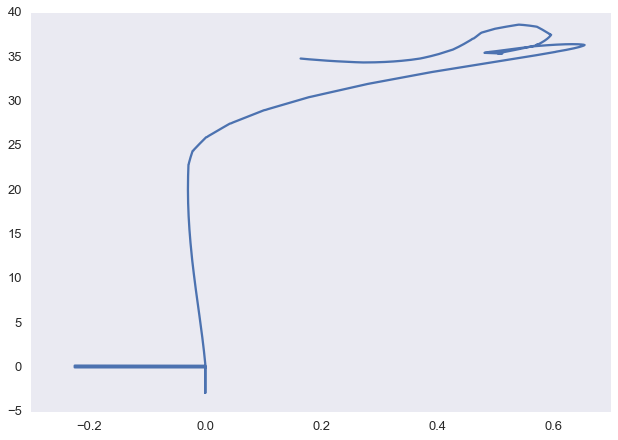

In [115]:
plt.plot(q[:,7], y)

In [116]:
import sys
sys.path.append('..')
from robot_model.private.ModelInterface import catheter
robot = catheter()


In [117]:
num = 10
def getModelPrediction(q_offset, q_scale):
    q_model = (q-q_offset).dot(q_scale)
    body = np.asarray([robot.getPointsAlongBody(qi, num) for qi in q_model])
    print(body.shape)
    return body

In [118]:
q_offset = np.zeros(10)
q_offset[-1] = -20
# body = getModelPrediction(q_offset, np.eye(10))

In [119]:
# body

In [120]:
body.shape

NameError: name 'body' is not defined

In [ ]:
blue  = sns.color_palette("deep")[0]
green = sns.color_palette("deep")[1]

i_list = np.linspace(50, body.shape[0]-1, 50)
print(len(i_list))
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,1], body[i, :num,2], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,1], body[i, num:,2], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('y')
plt.ylabel('z')

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,0], body[i, :num,1], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,0], body[i, num:,1], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num,0], body[i, :num,2], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num:,0], body[i, num:,2], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
# plt.savefig('ori.pdf', format = 'pdf', bbox_inches='tight')

In [ ]:
plt.plot(a * 180/np.pi)
plt.plot(e * 180/np.pi)

In [ ]:
for ix, i in enumerate(i_list):
    i = int(i)
#     plt.plot(body[i, :10,3], -body[i, :10,4], color = blue, alpha = ix/len(i_list))
    plt.plot( -body[i, num:,2], color = green, alpha = ix/len(i_list))

In [ ]:
plt.plot(time,z)
plt.plot(time, body[:,-1,2],'--')

In [ ]:
plt.plot(time, x_sensed[:,0])
plt.plot(time, x_sensed[:,1])
plt.plot(time, x_sensed[:,2])


In [ ]:
plt.plot(time, body[:,-1,0] - body[0,-1,0],'--')
plt.plot(time, body[:,-1,1],'--')
plt.plot(time, body[:,-1,2],'--')

In [ ]:
plt.plot(q[:,:4])
plt.plot(q_desired[:,:4])
plt.plot(q[:,-1])

In [ ]:
plt.plot(q[:,9])

In [ ]:
plt.plot(R[:,2,:])

In [ ]:
print(x_sensed[400,:] - x_sensed[5,:])

In [ ]:
x[:10]

In [ ]:
plt.plot(q[:,8],x)
plt.grid(True)

In [ ]:
plt.plot(a* 180/np.pi)
plt.plot(angles_sensed[:,0] * 180/np.pi)
plt.plot(angles_model[:,0] * 180/np.pi, '--')

In [ ]:
plt.plot(e * 180/np.pi, label ='sensed elevation')
plt.plot(angles_sensed[:,1] * 180/np.pi, label ='estimate of external beta')
plt.plot(angles_model[:,1] * 180/np.pi, label = 'external beta')
plt.ylabel('Angle (deg)')
plt.legend(loc = 'upper left', bbox_to_anchor = [1,1])


In [ ]:
x_sensed[1:10,:] - x_sensed[:9,:]

In [ ]:
plt.plot(q[:900,-2],'-')


In [ ]:
plt.plot(q[:,2], y)